In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles,make_blobs,make_moons#生成聚类的点
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
#聚类 KMeans 及 DBSCAN AgglomerativeClustering(层次聚类)

/Users/kefengyinyinyin....../anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 23618 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kefengyinyinyin....../anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 27425 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kefengyinyinyin....../anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 32858 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kefengyinyinyin....../anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 31867 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kefengyinyinyin....../anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 23618 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/

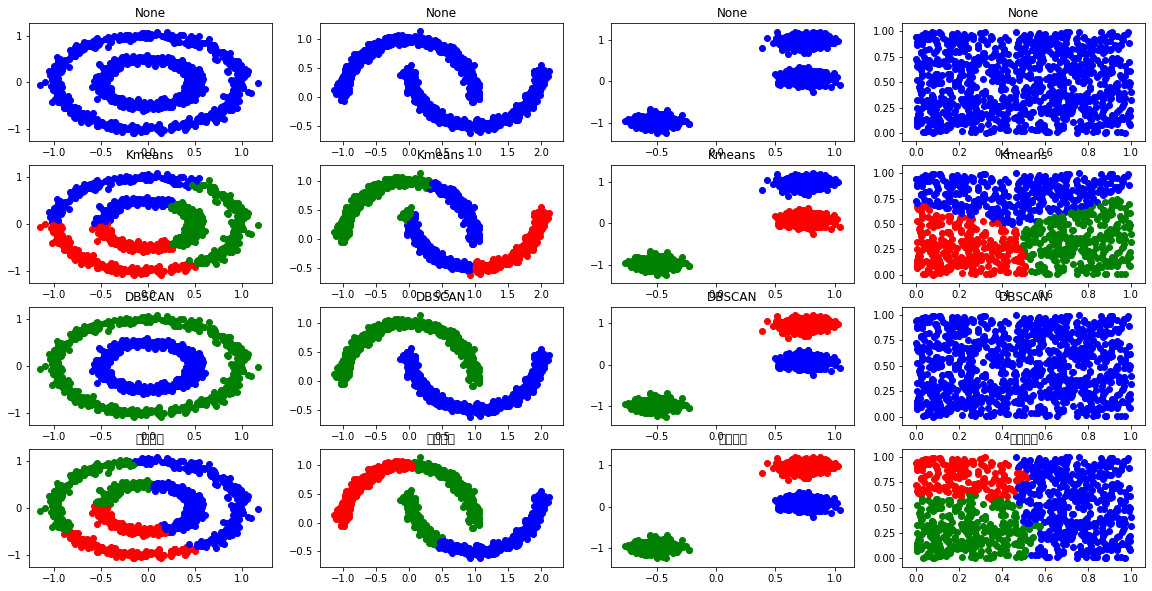

In [22]:
n_samples = 1000#定义1000个样本点
circles = make_circles(n_samples=n_samples,factor=0.5,noise=0.05)#factor=0.5是第一个图两个圆之间的距离
#构造样本点 factor=0.5 noise=0.05这是0.05比例的噪声
moons = make_moons(n_samples=n_samples,noise=0.05)
blobs = make_blobs(n_samples=n_samples,random_state=8,center_box=(-1,1),cluster_std=0.1)#random_state=8为了让每次产生的blob是一样的
#center_box=(-1,1)是取值范围 cluster_std=0.1设置标准差
random_data = np.random.rand(n_samples,2),None#2维的随机值 这里的None代表了它的标注 表示不要标注 只占位置 不使用
colors = 'bgrcmyk'#使用色系
data = [circles,moons,blobs,random_data]#数据集
f = plt.figure(figsize = (20,10))

models = [('None',None),('Kmeans',KMeans(n_clusters=3)),('DBSCAN',DBSCAN(min_samples = 3,eps = 0.2)),
          ('层次聚类',AgglomerativeClustering(n_clusters=3,linkage='ward'))]#建立模型 第一个是空的 显示了数据集本身
#n_clusters=2指要被分成几类 min_samples = 3是最小点数 eps = 0.5是E领域 
#ward是ESS方法 是平方残差和 linkage是用来选择方法的
for inx,clt in enumerate(models):#遍历 enumerate用于遍历model inx为它的下标 clt为它的实体
    clt_name,clt_entity = clt#说明上面遍历的是('None',None)整体 
    for i,dataset in enumerate(data):#dataset是数据集的意思
        X,Y = dataset#X为前面一部分array Y是后面部分
        if not clt_entity:#若实体为空时
            clt_res = [0 for item in range(len(X))]#定义一个聚类以后的标注clt_res
            #没有聚类之前 它的标注设为0 而它的长度要和数据的长度保持一致
        else:#挼实体不为空 开始聚类
            clt_entity.fit(X)#拟合的过程就是聚类的过程
            clt_res = clt_entity.labels_.astype(np.int)#把label转换成int格式
        f.add_subplot(len(models),len(data),inx*len(data)+i+1)#建立子图 长为模型的数量 列为数据集的数量
        #inx*len(data)+i+1是来确定画在哪个位置
        plt.title(clt_name)
        [plt.scatter(X[p,0],X[p,1],color = colors[clt_res[p]]) for p in range(len(X))]
        #画散点图 X[p,0]横轴坐标 X[p,1]纵轴坐标
        #colors[clt_res[p]]表示它的标注是多少 就显示什么颜色 
plt.show()

In [16]:
print(circles)#前面的array是它产生的点 后面的是它的标注

(array([[-0.074547  , -0.46056335],
       [ 0.54284778,  0.81149091],
       [ 0.47776387,  0.10696706],
       ...,
       [ 0.99611664, -0.27594384],
       [-1.02441297,  0.15715391],
       [ 0.31485177, -0.93581747]]), array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,